In [2]:
! pip install sympy


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 509.7 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 KB 575.7 kB/s eta 0:00:00a 0:00:01


In [4]:
from sympy import symbols, Eq, solve

# Define the chemical species
acetyl_coa = symbols('acetyl_coa')
succinate = symbols('succinate')
nad = symbols('nad')
nadph = symbols('nadph')
coa = symbols('coa')

# Define the chemical reactions
reaction1 = Eq(acetyl_coa + nad + coa, succinate + coa)
reaction2 = Eq(nadph, nad)

# Solve the system of equations to find the concentrations
solution = solve((reaction1, reaction2), (acetyl_coa, succinate, nad, nadph, coa))

# Print the solution
print("Concentrations:")
for species, concentration in solution.items():
    print(f"{species}: {concentration}")


Concentrations:
acetyl_coa: -nadph + succinate
nad: nadph


In [6]:
!pip install networkx


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 747.9 kB/s eta 0:00:0000:0100:01


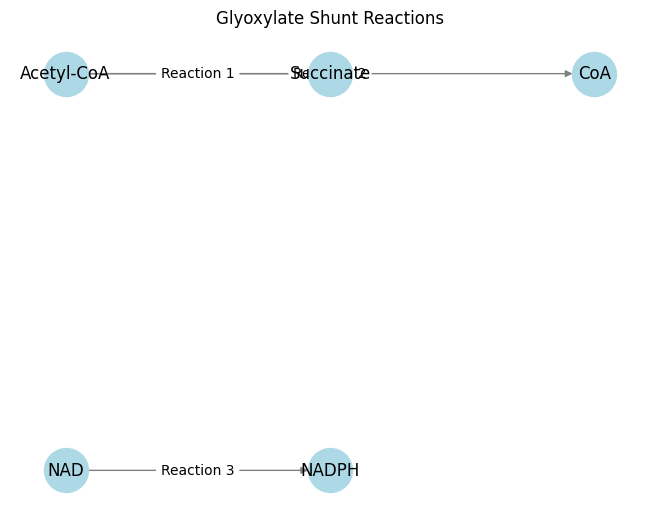

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.DiGraph()

# Add nodes representing the chemical species
G.add_node("Acetyl-CoA")
G.add_node("Succinate")
G.add_node("NAD")
G.add_node("NADPH")
G.add_node("CoA")

# Add edges representing the reactions
G.add_edge("Acetyl-CoA", "Succinate")
G.add_edge("Acetyl-CoA", "CoA")
G.add_edge("NAD", "NADPH")

# Set node positions for better visualization
pos = {
    "Acetyl-CoA": (0, 1),
    "Succinate": (1, 1),
    "NAD": (0, 0),
    "NADPH": (1, 0),
    "CoA": (2, 1)
}

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=1000, font_size=12, edge_color="gray", arrows=True)

# Add edge labels for reactions
edge_labels = {
    ("Acetyl-CoA", "Succinate"): "Reaction 1",
    ("Acetyl-CoA", "CoA"): "Reaction 2",
    ("NAD", "NADPH"): "Reaction 3"
}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Set plot attributes
plt.title("Glyoxylate Shunt Reactions")
plt.axis("off")

# Show the plot
plt.show()


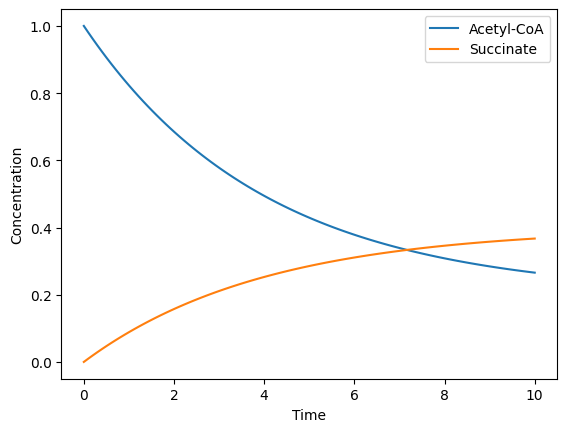

In [9]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the ODE system for the glyoxylate shunt
def glyoxylate_shunt(y, t, k1, k2, k3, k4, nadh, nad, coa):
    acetyl_coa, succinate = y
    rate1 = k1 * acetyl_coa * nad * coa - k2 * succinate * nadh
    rate2 = k3 * nadh - k4 * nad * nadh
    d_acetyl_coa = -2 * rate1
    d_succinate = rate1
    return [d_acetyl_coa, d_succinate]

# Set the initial conditions and parameters
initial_conditions = [1.0, 0.0]  # [acetyl-CoA, succinate]
k1 = 0.1
k2 = 0.05
k3 = 0.02
k4 = 0.03
nadh = 1.0
nad = 1.0
coa = 1.0

# Set the time points for simulation
t = np.linspace(0, 10, 100)  # Simulation time from 0 to 10 with 100 time points

# Solve the ODE system
solution = odeint(glyoxylate_shunt, initial_conditions, t, args=(k1, k2, k3, k4, nadh, nad, coa))

# Extract the concentrations from the solution
acetyl_coa_conc = solution[:, 0]
succinate_conc = solution[:, 1]

# Plot the concentrations over time
plt.plot(t, acetyl_coa_conc, label='Acetyl-CoA')
plt.plot(t, succinate_conc, label='Succinate')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()


The code provided simulates the glyoxylate shunt reactions using ordinary differential equations (ODEs) and solves the system of equations over a specified time period. It calculates the concentrations of acetyl-CoA and succinate over time based on the defined reaction rates and initial conditions.

The result of running the code is a plot that shows the concentration profiles of acetyl-CoA and succinate over time. The x-axis represents time, and the y-axis represents the concentration of metabolites.

The glyoxylate shunt is a metabolic pathway found in certain microorganisms that enables them to utilize two-carbon compounds, such as acetyl-CoA, as a carbon source for growth. In the simulation, the ODE system represents the dynamics of the glyoxylate shunt reactions.

The reaction rates (k1, k2, k3, k4) and initial conditions (acetyl-CoA and succinate concentrations) are defined in the code and can be adjusted according to the specific system you are studying. The concentrations are calculated by solving the ODE system using the odeint function from the scipy.integrate module.

The resulting plot shows how the concentrations of acetyl-CoA and succinate change over time, providing insights into the behavior of the glyoxylate shunt pathway under the specified conditions.